In [70]:
library(ggplot2)
library(RColorBrewer)
library(cowplot)
library(gridExtra)
library(ggsci)
library(scales)
library(viridis)
library(tidyverse)
library(pheatmap)

In [71]:
igvf_dir = '/u/project/cluo/terencew/igvf/pilot/multiome/'
adelus_dir = '/u/project/cluo/terencew/demux_benchmark/adelus_2023/'

In [72]:
order <- c('RNA', 'ATAC', 'both modalities')
droplet_inter = read.table(paste0(igvf_dir, '/csv/final_figures/figure4/figure_4d_inter_droplet.csv'))
droplet_inter <- droplet_inter %>% mutate(variable = str_replace(variable, "GEX", "RNA"))

In [73]:
order <- c('RNA', 'ATAC', 'both modalities')
indiv_inter = read.table(paste0(igvf_dir, '/csv/final_figures/figure4/figure_4d_inter_indivs.csv'))
indiv_inter <- indiv_inter %>% mutate(variable = str_replace(variable, "GEX", "RNA"))

In [74]:
head(droplet_inter)

,variable,value,type
,<chr>,<dbl>,<chr>
0,RNA,0.6241925,Stem_cell
1,ATAC,0.7276781,Stem_cell
2,both_modalities,0.5172968,Stem_cell
3,RNA,0.5570012,Aorta
4,ATAC,0.7127070,Aorta
5,both_modalities,0.4595324,Aorta


In [75]:
head(indiv_inter)

,variable,value,type
,<chr>,<dbl>,<chr>
0,RNA,0.9414268,Stem_cell
1,ATAC,0.9932408,Stem_cell
2,both_modalities,0.9493534,Stem_cell
3,RNA,0.7725302,Aorta
4,ATAC,0.8285635,Aorta
5,both_modalities,0.7160608,Aorta


In [76]:
droplet_inter$variable <- gsub('both_', 'both ', droplet_inter$variable)
indiv_inter$variable <- gsub('both_', 'both ', indiv_inter$variable)

In [77]:
droplet_inter$variable <- factor(droplet_inter$variable, levels = order)
indiv_inter$variable <- factor(indiv_inter$variable, levels = order)

In [133]:
igvf_inter = read.table(paste0(igvf_dir, '/csv/final_figures/figure4/figure_4c_igvf_mean.csv'))
igvf_inter <- igvf_inter %>% mutate(modality = str_replace(modality, "GEX", "RNA"))

In [134]:
adelus_inter = read.table(paste0(adelus_dir, '/csv/final_figures/figure4/figure_4c_adelus_mean.csv'))
adelus_inter <- adelus_inter %>% mutate(modality = str_replace(modality, "GEX", "RNA"))

In [135]:
igvf_inter$variable <- gsub('both_', 'both ', droplet_inter$variable)
adelus_inter$variable <- gsub('both_', 'both ', indiv_inter$variable)

In [136]:
method_order <- c('demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
                  'scsplit', 'scsplit_nogenos', 'souporcell', 'souporcell_nogenos')

In [137]:
adelus_inter$method <- factor(adelus_inter$method, levels = method_order)
igvf_inter$method <- factor(igvf_inter$method, levels = method_order)

In [138]:
head(igvf_inter)

,method,modality,frac_overlap,variable
,<fct>,<chr>,<dbl>,<chr>
0,demuxlet,RNA,0.8223385,RNA
1,freemuxlet,RNA,0.8222073,ATAC
2,vireo,RNA,0.8670923,both modalities
3,vireo_nogenos,RNA,0.8799273,RNA
4,scsplit,RNA,0.8461254,ATAC
5,scsplit_nogenos,RNA,0.7996477,both modalities


In [139]:
axis_size = 20
title_size = 25

In [140]:
igvf_inter$method <- gsub('_nogenos', ', no genotypes', igvf_inter$method)
adelus_inter$method <- gsub('_nogenos', ', no genotypes', adelus_inter$method)

In [141]:
order <- c('RNA', 'ATAC', 'cross modality')
igvf_inter$modality <- gsub('cross', 'cross modality', igvf_inter$modality)
adelus_inter$modality <- gsub('cross', 'cross modality', adelus_inter$modality)
igvf_inter$modality <- factor(igvf_inter$modality, levels = order)
adelus_inter$modality <- factor(adelus_inter$modality, levels = order)

In [154]:
fig4b_palette <- 'Blues'

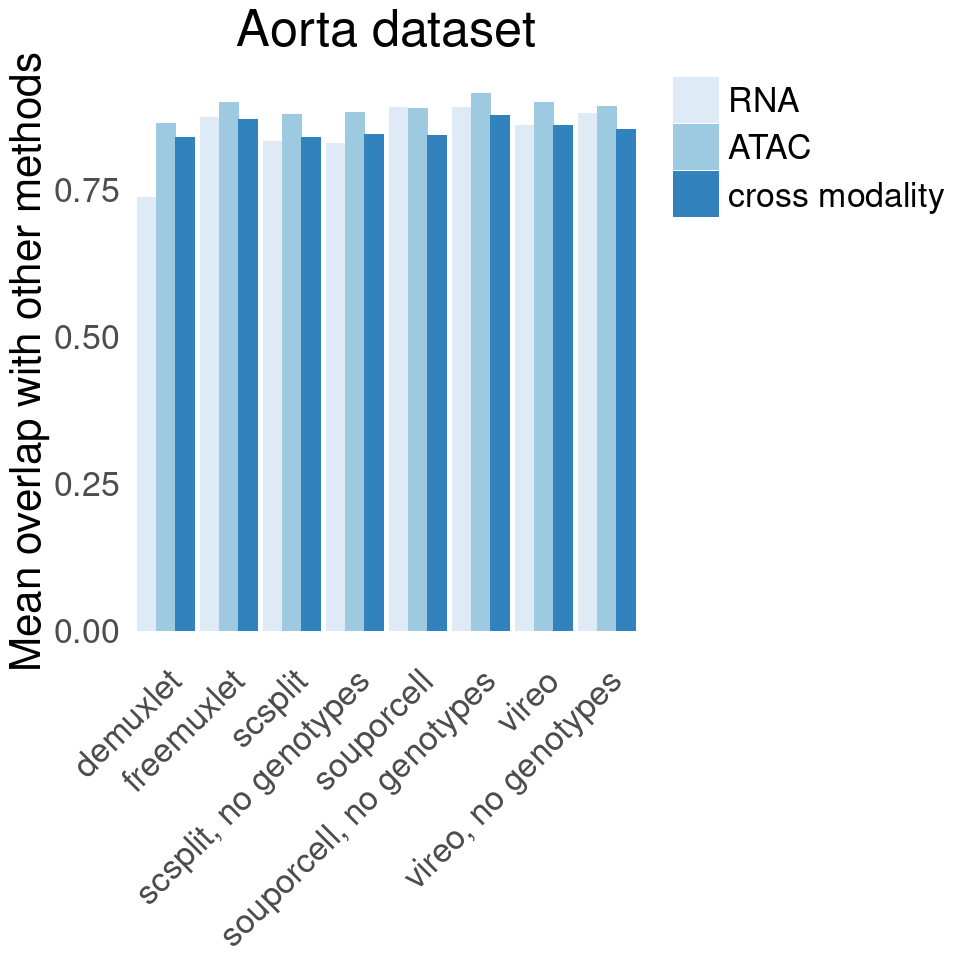

In [155]:
## legend
options(repr.plot.width=8, repr.plot.height=8)

ggplot(adelus_inter, aes(x = method, y = frac_overlap, fill = modality)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() + 
  labs(title = 'Aorta dataset', x = '', y = 'Mean overlap with other methods') +
  theme(axis.text.x = element_text(angle = 45, size=axis_size, hjust = 1),  # Rotate x-axis labels
        axis.text.y = element_text(angle = 0, size=axis_size, hjust = 1),
        legend.justification = c(1, 1),  # Justify legend to upper right
        legend.title = element_blank(),  # Remove legend title
        legend.background = element_rect(color = 'white'),  # White legend background
        panel.grid = element_blank(),  # Remove grid lines
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=title_size),
        plot.title = element_text(size = 30, hjust = 0.5),
                legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 20)) + 
  scale_fill_brewer(palette = fig4b_palette)

In [172]:
p1 <- ggplot(igvf_inter, aes(x = method, y = frac_overlap, fill = modality)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() + 
  labs(title = 'Stem cell dataset', x = '', y = 'Mean overlap with other methods') +
  theme(axis.text.x = element_text(angle = 45, size=axis_size, hjust = 1, color='black'),  # Rotate x-axis labels
        axis.text.y = element_text(angle = 0, size=axis_size, hjust = 1, color='black'),
        legend.justification = c(1, 1),  # Justify legend to upper right
        legend.title = element_blank(),  # Remove legend title
        legend.background = element_rect(color = 'white'),  # White legend background
        panel.grid = element_blank(),  # Remove grid lines
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=axis_size),
        plot.title = element_text(size = 30, hjust = 0.5),
         legend.position = 'none',
        legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),) +
  scale_fill_brewer(palette = fig4b_palette)

In [173]:
p2 <- ggplot(adelus_inter, aes(x = method, y = frac_overlap, fill = modality)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() + 
  labs(title = 'Aorta dataset', x = '', y = 'Mean overlap with other methods') +
  theme(axis.text.x = element_text(angle = 45, size=axis_size, hjust = 1, color='black'),  # Rotate x-axis labels
        axis.text.y = element_text(angle = 0, size=axis_size, hjust = 1, color='black'),
        legend.justification = c(1, 1),  # Justify legend to upper right
        legend.title = element_blank(),  # Remove legend title
        legend.background = element_rect(color = 'white'),  # White legend background
        panel.grid = element_blank(),  # Remove grid lines
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=axis_size),
        plot.title = element_text(size = 30, hjust = 0.5),
         legend.position = 'none',
                legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 20),) + 
  scale_fill_brewer(palette = fig4b_palette)


Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


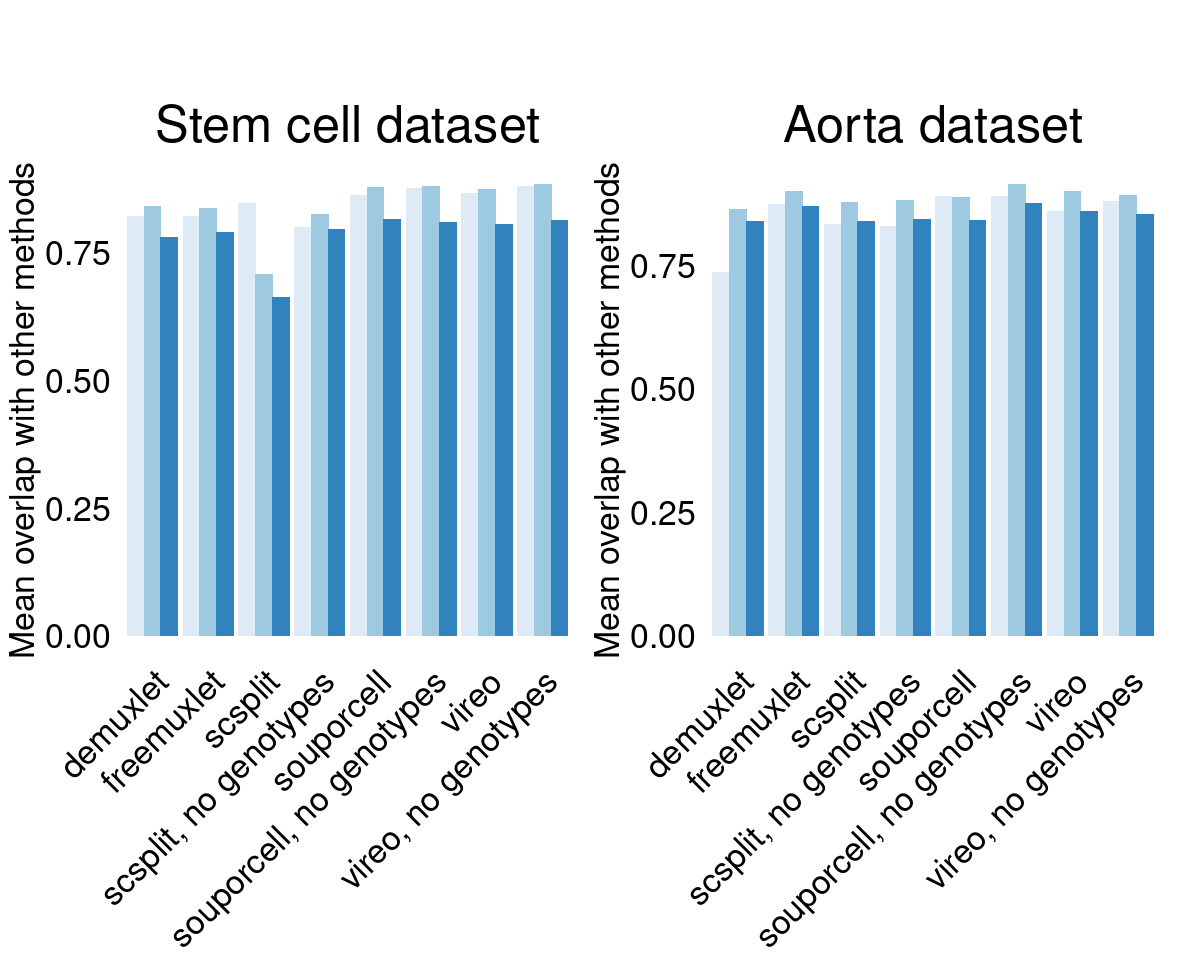

In [174]:
options(repr.plot.width=10, repr.plot.height=8)

prow <- plot_grid(p1, p2,
  align = 'vh',
#   labels = c('A', 'B', 'C', 'D'),
  labels = c(),
  nrow = 1
)
inter <- plot_grid(prow, rel_widths = c(4, .1), width=50)
final_plot <- ggdraw() +
  draw_text('', x = 0.5, y = 0.98, hjust = 0.5, vjust = 1,
            size = 20, color = 'black', family = 'arial') +
  draw_plot(inter, x = 0, y = 0, width = 1, height = 0.9)

# Show the final plot
print(final_plot)

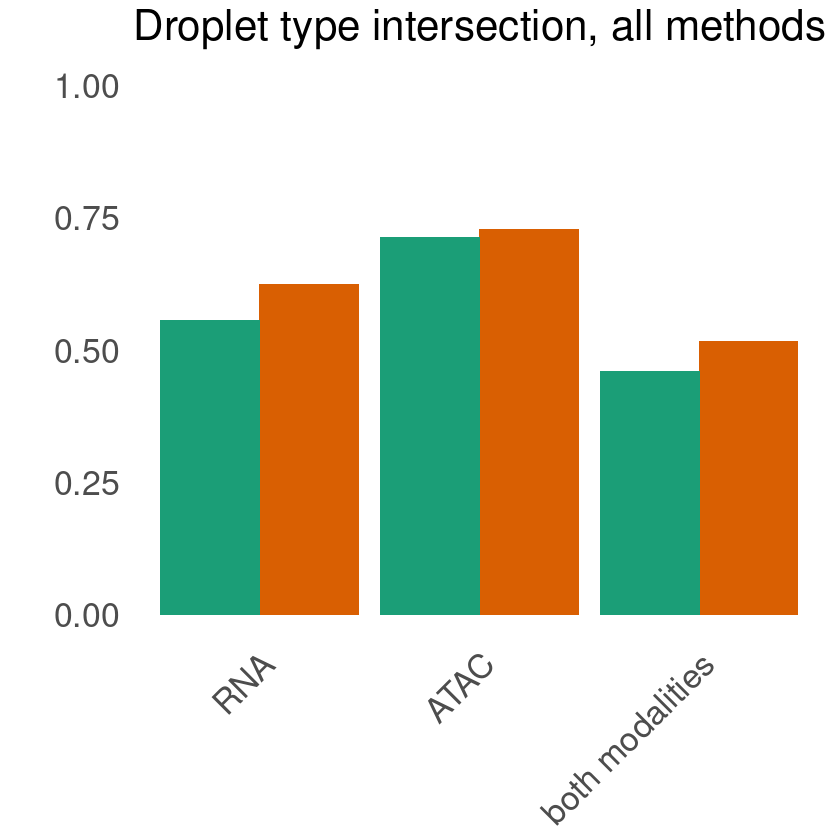

In [62]:
ggplot(droplet_inter, aes(x = variable, y = value, fill = type)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() + 
  labs(title = 'Droplet type intersection, all methods', x = '', y = '') +
  theme(axis.text.x = element_text(angle = 45, size=axis_size, hjust = 1),  # Rotate x-axis labels
        axis.text.y = element_text(angle = 0, size=axis_size, hjust = 1),
        legend.justification = c(1, 1),  # Justify legend to upper right
        legend.title = element_blank(),  # Remove legend title
        legend.background = element_rect(color = 'white'),  # White legend background
        panel.grid = element_blank(),  # Remove grid lines
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=title_size),
         legend.position = 'none',
        plot.title = element_text(size = 25, hjust = 0.5),
                legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 20),) +
        ylim(0, 1) +
  scale_fill_brewer(palette = "Dark2") # Change to a different color palette (e.g., Set3)

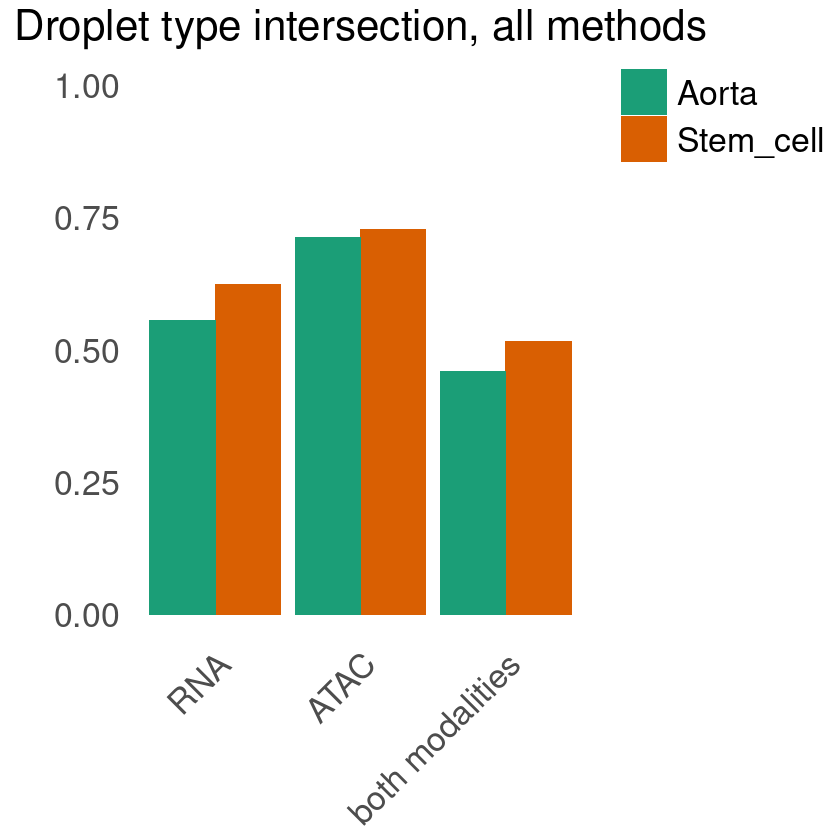

In [63]:
ggplot(droplet_inter, aes(x = variable, y = value, fill = type)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() + 
  labs(title = 'Droplet type intersection, all methods', x = '', y = '') +
  theme(axis.text.x = element_text(angle = 45, size=axis_size, hjust = 1),  # Rotate x-axis labels
        axis.text.y = element_text(angle = 0, size=axis_size, hjust = 1),
        legend.justification = c(1, 1),  # Justify legend to upper right
        legend.title = element_blank(),  # Remove legend title
        legend.background = element_rect(color = 'white'),  # White legend background
        panel.grid = element_blank(),  # Remove grid lines
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=title_size),
        plot.title = element_text(size = 25, hjust = 0.5),
                legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 20),) +
        ylim(0, 1) +
  scale_fill_brewer(palette = "Dark2") # Change to a different color palette (e.g., Set3)

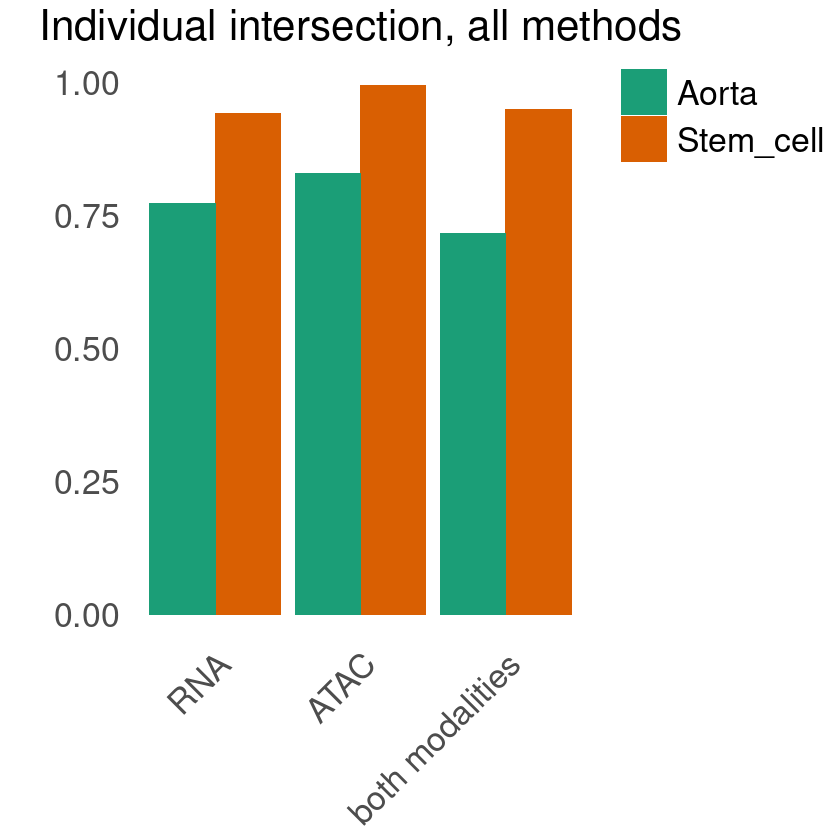

In [64]:
ggplot(indiv_inter, aes(x = variable, y = value, fill = type)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() + 
  labs(title = 'Individual intersection, all methods', x = '', y = '') +
  theme(axis.text.x = element_text(angle = 45, size=axis_size, hjust = 1),  # Rotate x-axis labels
        axis.text.y = element_text(angle = 0, size=axis_size, hjust = 1),
        legend.justification = c(1, 1),  # Justify legend to upper right
        legend.title = element_blank(),  # Remove legend title
        legend.background = element_rect(color = 'white'),  # White legend background
        panel.grid = element_blank(),  # Remove grid lines
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=title_size),
        plot.title = element_text(size = 25, hjust = 0.5),
                legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 20),) +
  scale_fill_brewer(palette = "Dark2") # Change to a different color palette (e.g., Set3)

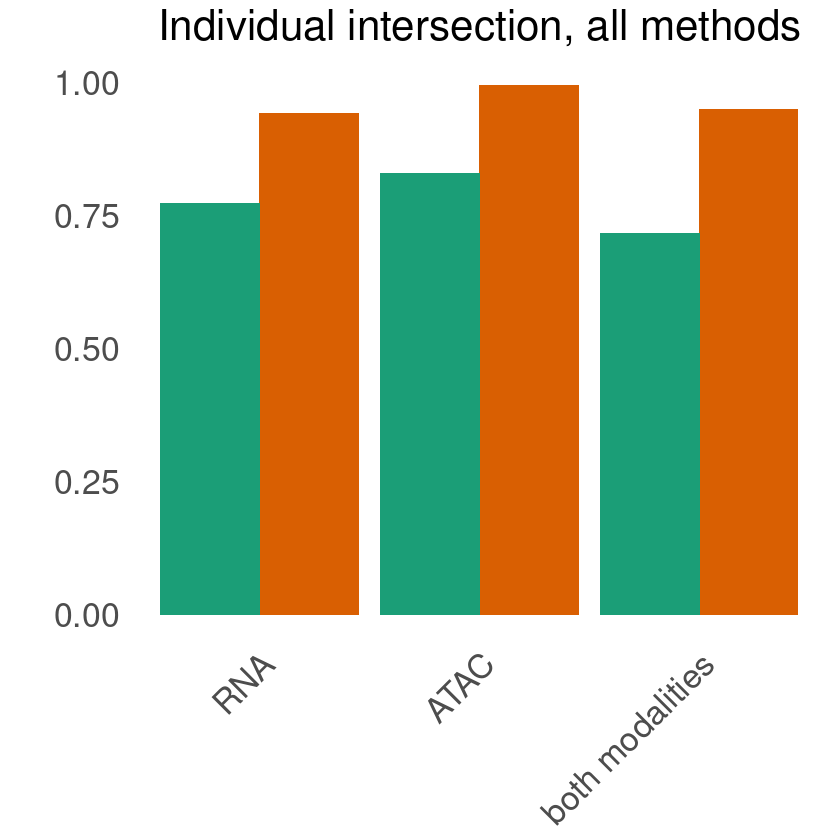

In [65]:
ggplot(indiv_inter, aes(x = variable, y = value, fill = type)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() + 
  labs(title = 'Individual intersection, all methods', x = '', y = '') +
  theme(axis.text.x = element_text(angle = 45, size=axis_size, hjust = 1),  # Rotate x-axis labels
        axis.text.y = element_text(angle = 0, size=axis_size, hjust = 1),
        legend.justification = c(1, 1),  # Justify legend to upper right
        legend.title = element_blank(),  # Remove legend title
        legend.background = element_rect(color = 'white'),  # White legend background
        panel.grid = element_blank(),  # Remove grid lines
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=title_size),
        plot.title = element_text(size = 25, hjust = 0.5),
                legend.key.size = unit(1, "cm"),
         legend.position = 'none',
         legend.text = element_text(size = 20),) +
  scale_fill_brewer(palette = "Dark2") # Change to a different color palette (e.g., Set3)

In [66]:
title_size = 20

In [67]:
p1 <- ggplot(droplet_inter, aes(x = variable, y = value, fill = type)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() + 
#   labs(title = 'Droplet type intersection, all methods', x = '', y = '') +
  labs(title = 'Droplet intersection', x = '', y = '') +
  theme(axis.text.x = element_text(angle = 45, size=axis_size, hjust = 1),  # Rotate x-axis labels
        axis.text.y = element_text(angle = 0, size=axis_size, hjust = 1),
        legend.justification = c(1, 1),  # Justify legend to upper right
        legend.title = element_blank(),  # Remove legend title
        legend.background = element_rect(color = 'white'),  # White legend background
        panel.grid = element_blank(),  # Remove grid lines
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=title_size),
         legend.position = 'none',
        plot.title = element_text(size = title_size, hjust = 0.5),
                legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 20),) +
        ylim(0, 1) +
  scale_fill_brewer(palette = "Dark2") # Change to a different color palette (e.g., Set3)

In [68]:
p2 <- ggplot(indiv_inter, aes(x = variable, y = value, fill = type)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() + 
#   labs(title = 'Individual intersection, all methods', x = '', y = '') +
  labs(title = 'Individual Intersection', x = '', y = '') +
  theme(axis.text.x = element_text(angle = 45, size=axis_size, hjust = 1),  # Rotate x-axis labels
        axis.text.y = element_text(angle = 0, size=axis_size, hjust = 1),
        legend.justification = c(1, 1),  # Justify legend to upper right
        legend.title = element_blank(),  # Remove legend title
        legend.background = element_rect(color = 'white'),  # White legend background
        panel.grid = element_blank(),  # Remove grid lines
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=title_size),
        plot.title = element_text(size = title_size, hjust = 0.5),
                legend.key.size = unit(1, "cm"),
         legend.position = 'none',
         legend.text = element_text(size = 20),) +
  scale_fill_brewer(palette = "Dark2") # Change to a different color palette (e.g., Set3)

Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


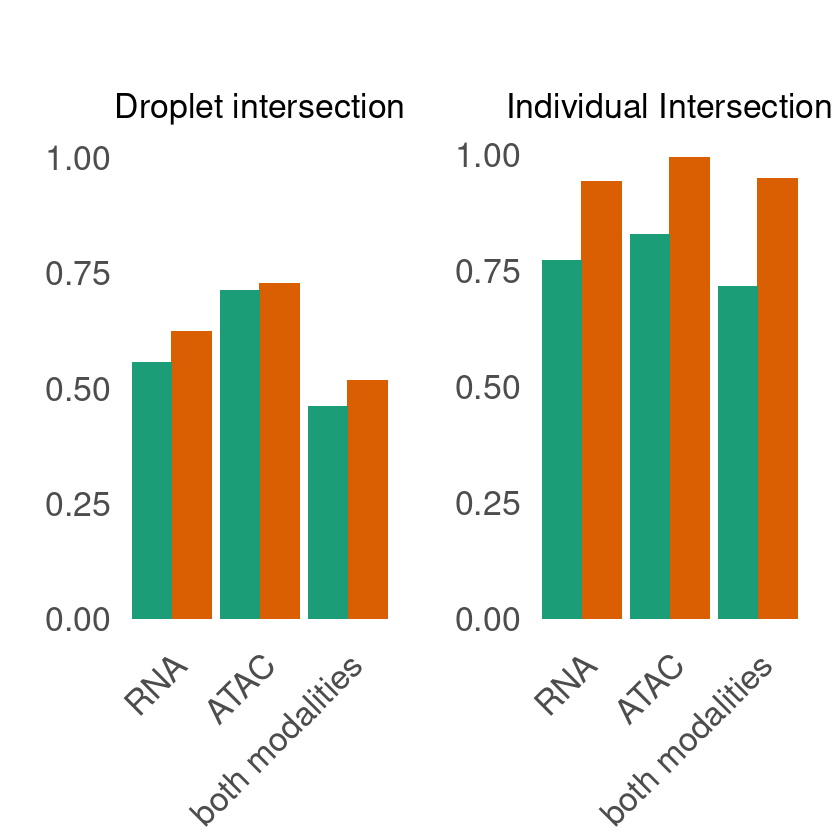

In [69]:
prow <- plot_grid(p1, p2,
  align = 'vh',
#   labels = c('A', 'B', 'C', 'D'),
  labels = c(),
  nrow = 1
)
inter <- plot_grid(prow, rel_widths = c(4, .1), width=50)
final_plot <- ggdraw() +
  draw_text('', x = 0.5, y = 0.98, hjust = 0.5, vjust = 1,
            size = 20, color = 'black', family = 'arial') +
  draw_plot(inter, x = 0, y = 0, width = 1, height = 0.9)

# Show the final plot
print(final_plot)